# Understanding Descriptive Statistics

Import the necessary libraries here:

In [432]:
# Libraries
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [433]:
# your code here
p = 1/6 # probability
k = 10 # number of trials

sample = np.random.randint(1,7, k)
df = pd.DataFrame(sample)[0].value_counts().sort_index()
df

1    2
2    4
3    2
4    1
6    1
Name: 0, dtype: int64

#### 2.- Plot the results sorted by value.

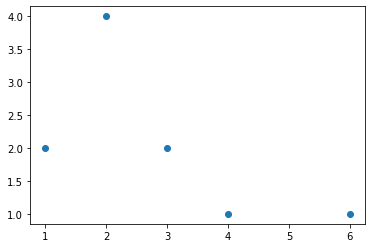

In [434]:
plt.scatter(x=df.index, y=df.values)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

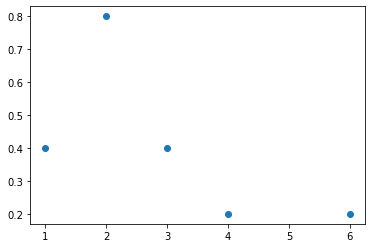

In [435]:
prob = df.values / len(df)

plt.scatter(x=df.index, y=prob)

In [436]:
"""
Since the second graph represents the probability distribution of the data in the first, both graphs have the same shape, with the only difference being the scale of the y axis
"""

'\nSince the second graph represents the probability distribution of the data in the first, both graphs have the same shape, with the only difference being the scale of the y axis\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [437]:
def my_mean(data):
    return np.sum(data * data.index)/sum(data)

my_mean(df)

2.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [438]:
# Step 1: frequency distribution
freq_dist = df.apply(lambda x : x / sum(df))

#Step 2: calculate the mean
calculated_mean = sum(freq_dist.index * freq_dist.values)
calculated_mean

2.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [439]:
new_df = df.reset_index()
new_df.columns = ['roll', 'counts']
new_df

,roll,counts
0,1,2
1,2,4
2,3,2
3,4,1
4,6,1


In [440]:
n = new_df['counts'].sum()
array = []

for line in new_df.iterrows():
    for i in range(0,line[1][1]):
        array.append(line[1][0])

array

[1, 1, 2, 2, 2, 2, 3, 3, 4, 6]

In [467]:
def recursive_median(array):
    local_array = array[:]
    #print(local_array)
    if len(local_array) == 1:
        return local_array[0]
    elif len(local_array) == 2:
        return (local_array[0] + local_array[1]) / 2
    else:
        local_array.pop(len(local_array)-1)
        local_array.pop(0)

        return recursive_median(local_array)
    
recursive_median(array)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [468]:
n = len(array)
q1 = recursive_median(array[0:int((n+1)/2)])
median = recursive_median(array)
q3 = recursive_median(array[int((n+1)/2):])
q4 = array[(n-1)]


print('Q1: ', q1)
print('Median: ', median)
print('Q3: ', q3)
print('Q4: ', q4)


'''
# For reference:
np_q1 = np.quantile(array, 0.25, interpolation='midpoint')
np_q2 = np.quantile(array, 0.5, interpolation='midpoint')
np_q3 = np.quantile(array, 0.75, interpolation='midpoint')
np_q4 = np.quantile(array, 1, interpolation='midpoint')
print(f'\nNumpy calculated quartiles: \nQ1: {np_q1}\nQ2: {np_q2}\nQ3: {np_q3}\nQ4: {np_q4}')
'''

Q1:  2
Median:  2.0
Q3:  3
Q4:  6


"\n# For reference:\nnp_q1 = np.quantile(array, 0.25, interpolation='midpoint')\nnp_q2 = np.quantile(array, 0.5, interpolation='midpoint')\nnp_q3 = np.quantile(array, 0.75, interpolation='midpoint')\nnp_q4 = np.quantile(array, 1, interpolation='midpoint')\nprint(f'\nNumpy calculated quartiles: \nQ1: {np_q1}\nQ2: {np_q2}\nQ3: {np_q3}\nQ4: {np_q4}')\n"

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: roll, dtype: int64


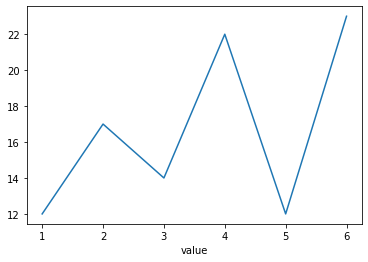

In [473]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df.sort_values('value')
'''
dist = df.groupby('value')['roll'].count()
dist.plot(x='roll', y='value')
'''

In [444]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [445]:
# your code here

#### 3.- Now, calculate the frequency distribution.


In [446]:
# your code here

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [447]:
# your code here

In [448]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [449]:
# your code here

In [450]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [451]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [452]:
# your code here

In [453]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [454]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [455]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [456]:
# your code here

In [457]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [458]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [459]:
# your code here

In [460]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [461]:
# your code here

In [462]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [463]:
# your code here

In [464]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [465]:
# your code here

In [466]:
"""
your comments here
"""

'\nyour comments here\n'